In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.
C:\Users\heine\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\heine\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\heine\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\heine\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [2]:
#df = pd.read_csv(".\\Data_USD.csv", header=None,skiprows=1)
df = pd.read_csv(".\\Data_USD.csv")
df.head().to_csv(".\\test.csv")

In [3]:
T=df.groupby("SEX") 

In [4]:
T.describe()

LIMIT_BAL_US                                                     \
           count         mean          std         min          25%   
SEX                                                                   
1        11888.0  5933.433651  4943.946037  362.857143  1814.285714   
2        18112.0  6171.708764  4544.124514  362.857143  2540.000000   

                                           EDUCATION            ...  \
             50%          75%          max     count      mean  ...   
SEX                                                             ...   
1    4717.142857  8708.571429  29028.57143   11888.0  1.839250  ...   
2    5442.857143  8708.571429  36285.71429   18112.0  1.862246  ...   

    CREDIT_UTILIZATION         DEFAULT_PAYMENT_NEXT_MO                      \
                   75%     max                   count      mean       std   
SEX                                                                          
1             0.867975  4.1406                 11888.0  0.241672  0.428115   
2             0.792862  6.4553                 18112.0  0.207763  0.405717   

                              
     min  25%  50%  75%  max  
SEX                           
1    0.0  0.0  0.0  0.0  1.0  
2    0.0  0.0  0.0  0.0  1.0  

[2 rows x 80 columns]

In [5]:
df.tail()

,LIMIT_BAL_US,SEX,EDUCATION,MARRIAGE,AGE,PAY_SCORE_AVG,BILL_AVG_US,PAY_AMT_AVG_US,PAY_TO_BILL,CREDIT_UTILIZATION,DEFAULT_PAYMENT_NEXT_MO
29995,7982.857143,1,3,1,39,0.00,4386.634429,257.326190,0.06,0.858855,0
29996,5442.857143,1,3,2,43,-0.67,128.100667,87.630000,0.68,0.011220,0
29997,1088.571429,1,2,2,37,1.33,426.332952,189.290476,0.44,0.118833,1
29998,2902.857143,1,3,1,41,-0.17,1612.361762,890.094619,0.55,-0.020563,1
29999,1814.285714,1,2,1,46,0.00,1396.238000,50.243619,0.04,0.958580,1


In [6]:
# X = df.drop('Y_Value',axis =1).values
# y = df['Y_Value'].values
X = df.drop('DEFAULT_PAYMENT_NEXT_MO',axis =1).values
X[2999,0]

1814.285714

In [7]:
X.shape

(30000, 10)

In [8]:
y = df['DEFAULT_PAYMENT_NEXT_MO'].values
#y.reshape(-1,1)

In [9]:
#print(X.shape)
X.shape

(30000, 10)

In [10]:
#print(y.shape)
y.shape

(30000,)

In [11]:
X_train, X_test, y_train, y_test = train_test_split (X,y,test_size=0.2, random_state=42)

In [12]:
y_test.T

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [13]:
X_test.shape

(6000, 10)

In [14]:
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train)

In [15]:
X_scaler

StandardScaler(copy=True, with_mean=True, with_std=True)

In [16]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [17]:
X_train_scaled

array([[-0.67235902,  0.80815856,  0.18430622, ..., -0.2791592 ,
        -0.05714296,  1.24956076],
       [-1.05776818, -1.23738094,  0.18430622, ..., -0.37554434,
        -0.05397067,  1.33599736],
       [ 0.0984593 ,  0.80815856,  3.97142033, ..., -0.21391973,
         0.01106132, -0.74437748],
       ...,
       [-0.90360452, -1.23738094, -1.07806515, ..., -0.50323365,
         0.09512706, -1.02595019],
       [-0.74944086,  0.80815856,  0.18430622, ..., -0.31461613,
        -0.05714296,  1.53357828],
       [-0.05570437,  0.80815856,  0.18430622, ..., -0.12053028,
         0.10781623, -1.02625309]])

In [18]:
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

In [19]:
from keras.models import Sequential

#instantiate
model = Sequential()

In [20]:
from keras.layers import Dense

number_inputs = 10
number_hidden = 30

model.add(Dense(units = number_hidden, activation ='relu', input_dim=number_inputs))
model.add(Dense(units = 35, activation ='relu')) #second hidden layer
model.add(Dense(units = 25, activation ='relu')) #second hidden layer
model.add(Dense(units = 15, activation ='relu')) #second hidden layer
model.add(Dense(units = 5, activation ='relu')) #third hidden layer

In [21]:
number_classes =2 ## yes or no
model.add(Dense(units = number_classes, activation = 'softmax'))

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 30)                330       
_________________________________________________________________
dense_2 (Dense)              (None, 35)                1085      
_________________________________________________________________
dense_3 (Dense)              (None, 25)                900       
_________________________________________________________________
dense_4 (Dense)              (None, 15)                390       
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 80        
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 12        
Total params: 2,797
Trainable params: 2,797
Non-trainable params: 0
____________________________________________________

In [23]:
#compile the model
model.compile(optimizer = 'sgd' ,
             loss = 'categorical_crossentropy',
             metrics =['accuracy'])

In [24]:
#train the model

model.fit(X_train_scaled, y_train_categorical, epochs=100,shuffle = True,verbose =2)


Epoch 1/100
 - 2s - loss: 0.5336 - accuracy: 0.7782
Epoch 2/100
 - 1s - loss: 0.4987 - accuracy: 0.7782
Epoch 3/100
 - 1s - loss: 0.4804 - accuracy: 0.7782
Epoch 4/100
 - 2s - loss: 0.4696 - accuracy: 0.7965
Epoch 5/100
 - 2s - loss: 0.4625 - accuracy: 0.8047
Epoch 6/100
 - 2s - loss: 0.4579 - accuracy: 0.8060
Epoch 7/100
 - 1s - loss: 0.4553 - accuracy: 0.8067
Epoch 8/100
 - 1s - loss: 0.4538 - accuracy: 0.8055
Epoch 9/100
 - 1s - loss: 0.4527 - accuracy: 0.8055
Epoch 10/100
 - 1s - loss: 0.4516 - accuracy: 0.8053
Epoch 11/100
 - 1s - loss: 0.4506 - accuracy: 0.8062
Epoch 12/100
 - 1s - loss: 0.4496 - accuracy: 0.8050
Epoch 13/100
 - 1s - loss: 0.4488 - accuracy: 0.8055
Epoch 14/100
 - 1s - loss: 0.4479 - accuracy: 0.8055
Epoch 15/100
 - 2s - loss: 0.4474 - accuracy: 0.8060
Epoch 16/100
 - 1s - loss: 0.4465 - accuracy: 0.8065
Epoch 17/100
 - 1s - loss: 0.4461 - accuracy: 0.8067
Epoch 18/100
 - 1s - loss: 0.4453 - accuracy: 0.8062
Epoch 19/100
 - 1s - loss: 0.4449 - accuracy: 0.8062
E

In [25]:
model.save("ccneuralnetwork.h5")

In [26]:
#quantify the model
model_loss, model_accuracy = model.evaluate(X_test_scaled,y_test_categorical,verbose =2)
print( model_loss )
print (model_accuracy)

0.45065889310836793
0.8054999709129333


F1, Precision Recall, and Confusion Matrix

In [27]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

In [28]:
y_prediction = model.predict_classes(X_test)

In [29]:
y_prediction.reshape(-1,1)

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

In [30]:
print("Recall score:"+ str(recall_score(y_test, y_prediction)))

Recall score:0.0


In [31]:
print(classification_report(y_test, y_prediction,
                            target_names=["default", "non_default"]))

              precision    recall  f1-score   support

     default       0.78      1.00      0.88      4687
 non_default       0.00      0.00      0.00      1313

    accuracy                           0.78      6000
   macro avg       0.39      0.50      0.44      6000
weighted avg       0.61      0.78      0.69      6000



C:\Users\heine\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [32]:
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

Confusion matrix, without normalization
[[4687    0]
 [1313    0]]
Normalized confusion matrix
[[1. 0.]
 [1. 0.]]


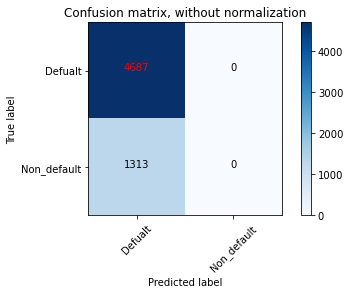

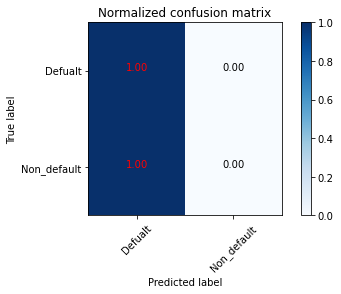

In [33]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="red" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_prediction)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Defualt', 'Non_default'],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Defualt', 'Non_default'], normalize=True,
                      title='Normalized confusion matrix')

plt.show()